# `Fine-Tuning`

previously we have covered transfer learning feature extraction, now its time to learn about a new kind of transfer learning - fine Tuning

In [1]:
import tensorflow as tf
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Import Helper function

in previous chapter, we have created a buch of helper function, now we could re write them all however this is tedious

so, it's good idea to put functions in you'll want to use again in a script you can download and import into your notebook

we've done this for sone of the functions we've used previously here:

https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-05-06 01:42:47--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-05-06 01:42:47 (110 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
# Import helper functions we're going to use in this notebook
from helper_functions import create_tensorboard_callback, plot_loss_curves
from helper_functions import unzip_data, walk_through_dir

## Let's get some data

this time we're going to see how we can use pretrained models within tf.keras.application and apply them to our problems (recognizing images of food)

In [16]:
# Get 10 % of training data of 10 classes of Food101

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2024-05-06 01:46:21--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.107.207, 173.194.202.207, 173.194.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.107.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   175MB/s    in 0.9s    

2024-05-06 01:46:22 (175 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [17]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [18]:
# Create training and test directory paths

train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [19]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
#Load data without data generator or augmentation
train_data_10_percent = image_dataset_from_directory(train_dir,
                                                     image_size = IMG_SIZE,
                                                     label_mode = 'categorical',
                                                     batch_size = BATCH_SIZE)

test_data = image_dataset_from_directory(directory = test_dir,
                                         image_size = IMG_SIZE,
                                         label_mode = 'categorical',
                                         batch_size = BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [20]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [21]:
for image, labels in train_data_10_percent.take(1):
  print(image, labels)

tf.Tensor(
[[[[196.61224   172.61224   146.61224  ]
   [198.9796    174.9796    148.9796   ]
   [199.09694   172.66837   149.88264  ]
   ...
   [116.09187    73.01535    57.244915 ]
   [116.352066   73.352066   57.352066 ]
   [114.77025    71.77025    55.770245 ]]

  [[196.7602    172.7602    146.7602   ]
   [198.9949    174.9949    150.9949   ]
   [205.81122   179.59694   157.0255   ]
   ...
   [119.18372    78.11229    60.25515  ]
   [113.80112    72.80112    54.801113 ]
   [119.91821    78.91821    60.918213 ]]

  [[198.70407   173.70407   152.13264  ]
   [205.37245   180.37245   158.80103  ]
   [206.61734   179.61734   159.04591  ]
   ...
   [103.19384    62.8367     42.19384  ]
   [115.45409    75.09694    54.882656 ]
   [121.00532    80.64818    62.005318 ]]

  ...

  [[177.90308   154.68881   124.331604 ]
   [179.28087   155.28087   127.28087  ]
   [170.10213   145.33685   118.05623  ]
   ...
   [ 40.6682      4.382619   10.382619 ]
   [ 25.969263    3.0255196   8.826502 ]
   [ 

## Model0: build a transfer learning model using the keras function api

the sequential API is train-forward, it runs our layers in Sequential order
but function API gives us more flexiblity for our models -
https://www.tensorflow.org/guide/keras/functional

In [22]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.8/266.8 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.8 MB/s eta 0:00:00


In [23]:
import wandb as wb
wb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [24]:
from wandb.keras import WandbMetricsLogger

In [25]:
# wb.init(project="Food101", name="10_percent_feature_extraction")

# 1. Create base model with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top = False)

# 2. Freeze the base model
base_model.trainable = False

# 3. Create input into our model
inputs = tf.keras.layers.Input(shape = IMG_SIZE+ (3,), name = 'Input_layer')

# 4. if using Resnet50v2 you will need to normalize inputs(you don't have to do it for Efficient net )
# x = tf.keras.layer.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. Pass the inputs to base_model
x = base_model(inputs)
print(f'Shape after passing inputs through base model: {x.shape}')

# 6. Average Pool the outputs (Aggregate all the most important information, reduce the number of computation)
x = tf.keras.layers.GlobalAveragePooling2D(name = 'global_average_Pooling_layer')(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}") # this layer is going to help us get important details
#and also after this our vector is going to be 1-d means we can use it to Dense layer for outputs

# 7. Create the output Activation layer
outputs = tf.keras.layers.Dense(10, activation = 'softmax', name = 'output_layer')(x)

# 8. combine the inputs and outputs into the model
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_0.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

history_0 = model_0.fit(train_data_10_percent,
                        epochs = 5,
                        steps_per_epoch = len(train_data_10_percent),
                        validation_data = test_data,
                        validation_steps = int(0.25 * len(test_data)),
                        callbacks = [create_tensorboard_callback(dir_name = 'Transfer_learning',
                                                                 experiment_name = "10_percent_feature_extraction"),
                                    #  WandbMetricsLogger()
                                     ])

# wb.finish()

Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)
Saving TensorBoard log files to: Transfer_learning/10_percent_feature_extraction/20240506-014720
Epoch 1/5
24/24 [==============================] - 19s 239ms/step - loss: 1.9001 - accuracy: 0.4040 - val_loss: 1.3058 - val_accuracy: 0.7270
Epoch 2/5
24/24 [==============================] - 3s 129ms/step - loss: 1.1136 - accuracy: 0.7600 - val_loss: 0.8924 - val_accuracy: 0.8125
Epoch 3/5
24/24 [==============================] - 3s 129ms/step - loss: 0.7929 - accuracy: 0.8400 - val_loss: 0.7282 - val_accuracy: 0.8339
Epoch 4/5
24/24 [==============================] - 5s 187ms/step - loss: 0.6493 - accuracy: 0.8627 - val_loss: 0.6385 - val_accuracy: 0.8438
Epoch 5/5
24/24 [==============================] - 3s 128ms/step - loss: 0.5520 - accuracy: 0.8760 - val_loss: 0.5698 - val_accuracy: 0.8553


In [26]:
results_10_percent_data = model_0.evaluate(test_data)

79/79 [==============================] - 6s 73ms/step - loss: 0.5565 - accuracy: 0.8608


In [27]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_2
1 rescaling_2
2 normalization_1
3 rescaling_3
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activati

In [28]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling_2 (Rescaling)     (None, None, None, 3)        0         ['input_2[0][0]']             
                                                                                                  
 normalization_1 (Normaliza  (None, None, None, 3)        7         ['rescaling_2[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_3 (Rescaling)     (None, None, None, 3)        0         ['normalization_1

In [29]:
model_0.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_Pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4062381 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049571 (15.45 MB)
________________

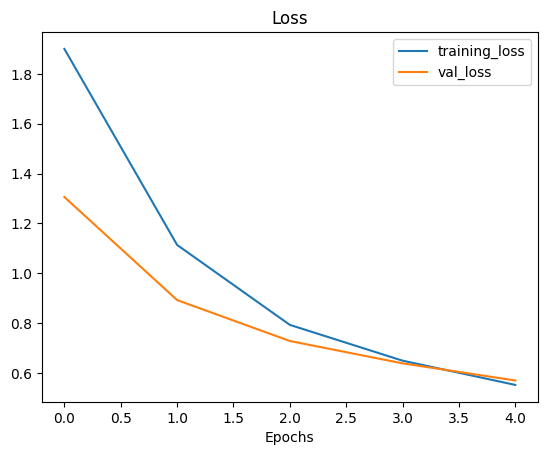

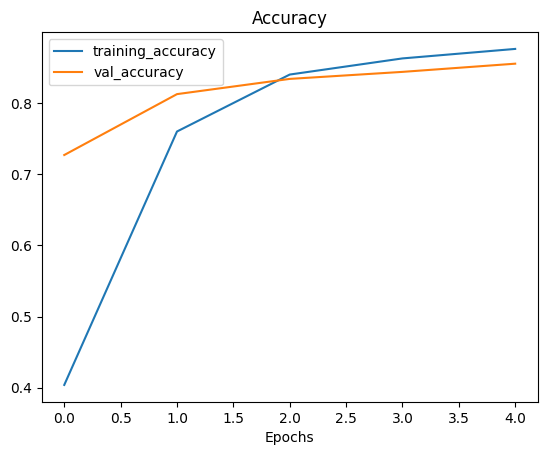

In [30]:
plot_loss_curves(history_0)

## Getting a feature vector from a trained Model

Let's demonstrate the GlobalAveragePooling2D layer
we have a tensor after our model goes through base_model of shape (None, 7, 7, 1280)..
but then when it pass through GlobalAveragePooling2D, it turns into (None, 1280),
Let's use a similar sshaped tensor fo (1, 4,4,3) and then pass it to the GlobalAveragePooling2D

In [27]:
input_shape = (1,4,4,3)

tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor: \n{input_tensor}\n")

global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D Global Average Pooled random tensor: \n{global_average_pooled_tensor}\n")

print(f"Shape of inputs tensor: {input_tensor.shape}")
print(f"Shape of GlobalAveragePooled2D tensor: {global_average_pooled_tensor.shape} ")

Random input tensor: 
[[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338894  0.97772694]
   [ 0.24694404  0.20573746 -0.52562326]
   [ 0.32410017  0.02545409 -0.10638496]
   [-0.63694745  1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815628  0.23479679 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

2D Global Average Pooled random tensor: 
[[-0.09368646 -0.45840448 -0.2885598 ]]

Shape of inputs tensor: (1, 4, 4, 3)
Shape of GlobalAveragePooled2D tensor: (1, 3) 


In [29]:
# Let's replicate the GlobalAveragePool2D layer
tf.reduce_mean(input_tensor, axis = [1,2]) # (0, 1, 2, 3)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

**Note**: One of the reason feature extraction transfer learning is named how it is because what often happedn is pretrained model outputs a `feature vector`

**FEATURE VECTOR** - A feature vector is a learned representation of the input data(a compressed form of the input data based on how the model see's it)

## Running a series of transfer Learning experiments

we've seen the incredible results transfer lerning can get with only 10% of the training data, but how does it go with 1% of the training data. how about we set up a bunch of experiments to find out:

1. `model_1` - use feature extraction transfer learning with 1% of training data with data augmentation

2. `model_2` - use feature extraction transfer learning with 10% of training data with data Augmentation

3. `model_3` - Use finetuning transfer learning on 10% of the training data with data Augmentation

4. `model_4` - Use fine-tuning transfer leraning on 100% of the training data with data Augmenation

**Note** - Throughout all experiments the same test dataset will be used to evaluate our model .. this ensures consitency across evaluation metrics.

In [4]:
# Download and unzip data for 1% of the data - preprocessed from food101
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

unzip_data("10_food_classes_1_percent.zip")

In [5]:
# Create training and test dirs
train_dir_1_percent = "10_food_classes_1_percent/train"
test_dir = "10_food_classes_1_percent/test"

In [6]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'

In [8]:
# setup data loaders
import tensorflow as tf
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode = 'categorical',
                                                                           image_size = IMG_SIZE,
                                                                           batch_size = BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode = 'categorical',
                                                                image_size = IMG_SIZE,
                                                                batch_size = BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [9]:
tf.__version__

'2.15.0'

## Adding data augmentation right into the  model

to Add data agumentation right into our model, we can use the layers inside: we want tensorflow version 2.x
- tf.keras.layers.experimental.preprocessing()

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# There are some benefits of using data augmentation as a layer
# * it will be accelerated by the GPU during training (less time in experiments)
# * it will also be saved along with model when you save it
# * Automatically standardize the inputs as the model requirements

# Create data augmentation stage with horizontal flips, rotations , zooms etc

data_augmentation = keras.Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2)
], name ='Data_augmentation')

## Visualize the Data augmentation layer and see what happedn to our data

(384, 512, 3)
(1, 371, 412, 3)


(-0.5, 411.5, 370.5, -0.5)

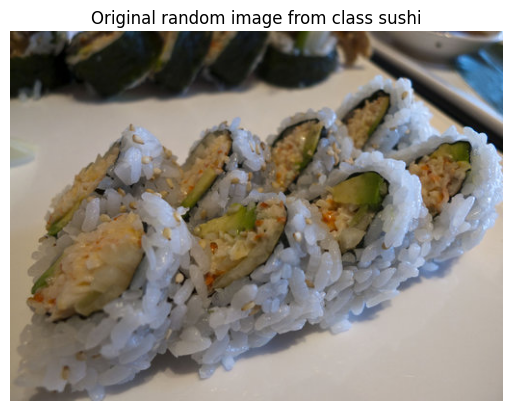

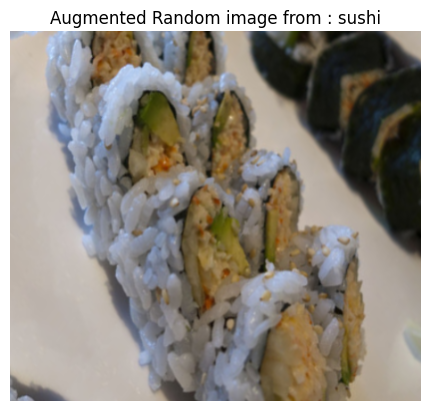

In [11]:
# View a random image and compare it to its augmenated version
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = os.path.join(target_dir, random_image)

img = plt.imread(random_image_path)
plt.imshow(img)
print(img.shape)
plt.title(f"Original random image from class {target_class}")
plt.axis('off')

# Now read and plot our augmentated random image
augmented_image = data_augmentation(tf.expand_dims(img, axis = 0), training = True)
plt.figure()
print(augmented_image.shape)
plt.title(f"Augmented Random image from : {target_class}")
plt.imshow(tf.squeeze(augmented_image)/255.)
plt.axis('off')

## Model 1: Feature Extraction transfer learning on 1% of the data with data augmentation

In [12]:
input_shape = (224, 224, 3)
# wb.init(project = 'Food101',
#         name = '1_percent_data_model_1')
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

# Create input layer
inputs = layers.Input(shape = input_shape, name = 'Input_layer')

# Add data Agumentation as a layer
x = data_augmentation(inputs)

# Give base model inputs (After augmentation) and don't train it
x = base_model(x, training = False)

# Pool output feature of the base model
x = layers.GlobalAveragePooling2D(name = "Global_average_pooling_layer")(x)

# put a dense layer on as the output
outputs = layers.Dense(10, activation = 'softmax', name = 'output_layer')(x)

model_1 = keras.Model(inputs, outputs)

# compile the model
model_1.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_1_percent = model_1.fit(train_data_1_percent,
                                epochs = 5,
                                steps_per_epoch = len(train_data_1_percent),
                                validation_data= test_data,
                                validation_steps = int(0.25 * len(test_data)),
                                # Track our training logs
                                callbacks = [create_tensorboard_callback(dir_name = "Transfer_learning",
                                                                         experiment_name = "1_percent_data"),
                                            #  WandbMetricsLogger()
                                             ])

# wb.finish()

16705208/16705208 [==============================] - 0s 0us/step
Saving TensorBoard log files to: Transfer_learning/1_percent_data/20240506-014411
Epoch 1/5
3/3 [==============================] - 17s 3s/step - loss: 2.3547 - accuracy: 0.1429 - val_loss: 2.1421 - val_accuracy: 0.2549
Epoch 2/5
3/3 [==============================] - 4s 2s/step - loss: 2.0869 - accuracy: 0.2429 - val_loss: 2.0204 - val_accuracy: 0.3339
Epoch 3/5
3/3 [==============================] - 5s 2s/step - loss: 1.8721 - accuracy: 0.5000 - val_loss: 1.8990 - val_accuracy: 0.4260
Epoch 4/5
3/3 [==============================] - 4s 2s/step - loss: 1.7259 - accuracy: 0.5571 - val_loss: 1.8242 - val_accuracy: 0.4589
Epoch 5/5
3/3 [==============================] - 4s 1s/step - loss: 1.5846 - accuracy: 0.6571 - val_loss: 1.7315 - val_accuracy: 0.5033


In [14]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 Data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 Global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                12810 

In [15]:
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug

79/79 [==============================] - 8s 89ms/step - loss: 1.7541 - accuracy: 0.4880


[1.7540644407272339, 0.4880000054836273]

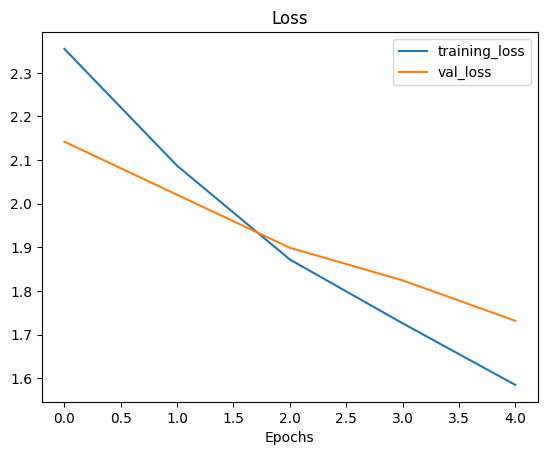

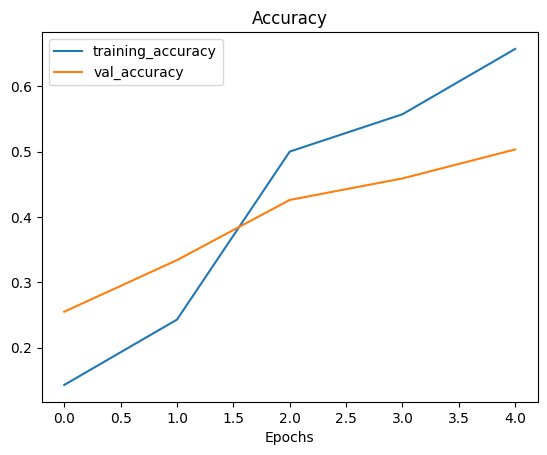

In [32]:
plot_loss_curves(history_1_percent)

## model_2: feature Extraction transfer learning model with 10% of data and data augmentation

In [33]:
train_dir_10_percent = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [36]:
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            label_mode = 'categorical',
                                                                            image_size = IMG_SIZE ,
                                                                            batch_size = 32)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode = 'categorical',
                                                                image_size = IMG_SIZE,
                                                                batch_size = 32)



Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## Create model 2 with data agumentation built in

In [38]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

data_agumentation = Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomRotation(0.2)
], name = 'data_augmentation')

input_shape = IMG_SIZE + (3,)

base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

inputs = layers.Input(shape = input_shape, name = 'input_layer')
x = data_augmentation(inputs)
x = base_model(x, training = False)
x = layers.GlobalAveragePooling2D(name = 'global_average_pooling_2d')(x)
outputs = layers.Dense(10, activation = 'softmax', name = 'output_layer')(x)

model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 Data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling_2d   (None, 1280)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

### We're goint to create model checkpoint callback

The model Checkpoint callback intermediatelly saves our model (the full model or just hte weights) during training. This is usefull so we can come and start where we left off

In [39]:
checkpoint_path = 'ten_percent_model_checkpoints_weights/checkpoint.ckpt'

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                                         save_weights_only = True,
                                                         save_best_only = False,
                                                         save_freq = 'epoch',
                                                         verbose = 1)


In [42]:
wb.init(project = 'Food101', name = '10_percent_data_aug_model_2')
history_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                          steps_per_epoch = len(train_data_10_percent),
                                          callbacks = [
                                              create_tensorboard_callback(dir_name = 'transfer_learning',
                                                                          experiment_name = '10_percent_data_aug'),
                                              checkpoint_callback,
                                              WandbMetricsLogger()
                                          ], epochs = 5,
                                          validation_data = test_data,
                                          validation_steps = int(0.25* len(test_data))
                                          )
wb.finish()

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20240506-020708
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0491 - accuracy: 0.2987
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 31s 1s/step - loss: 2.0491 - accuracy: 0.2987 - val_loss: 1.4525 - val_accuracy: 0.6793
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3255 - accuracy: 0.7027
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 19s 767ms/step - loss: 1.3255 - accuracy: 0.7027 - val_loss: 0.9993 - val_accuracy: 0.7911
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.9960 - accuracy: 0.7840
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 19s 762ms/step - loss: 0.9960 - accuracy: 0.7840 - val_loss: 0.7979 - val_accuracy: 0.8092
Epoc

epoch/accuracy,▁▆▇▇█
epoch/epoch,▁▃▅▆█
epoch/learning_rate,▁▁▁▁▁
epoch/loss,█▄▂▂▁
epoch/val_accuracy,▁▆▇██
epoch/val_loss,█▄▂▁▁
epoch/accuracy,0.836
epoch/epoch,4
epoch/learning_rate,0.001
epoch/loss,0.72001
epoch/val_accuracy,0.82237


In [43]:
results_10_percent_data_aug = model_2.evaluate(test_data)

79/79 [==============================] - 8s 84ms/step - loss: 0.6189 - accuracy: 0.8472


In [44]:
model_0.evaluate(test_data)

79/79 [==============================] - 8s 84ms/step - loss: 0.5565 - accuracy: 0.8608


[0.5564911365509033, 0.86080002784729]

In [45]:
results_10_percent_data_aug

[0.6189006567001343, 0.8471999764442444]

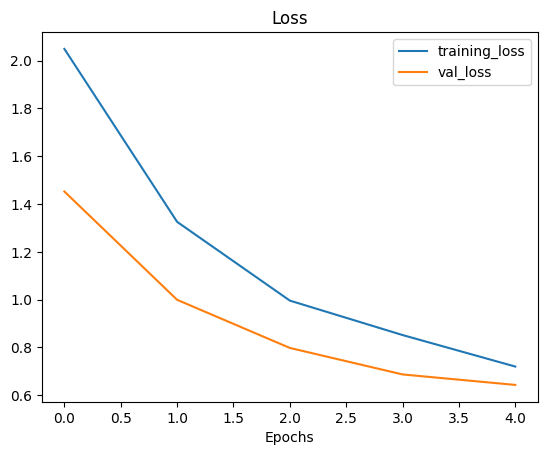

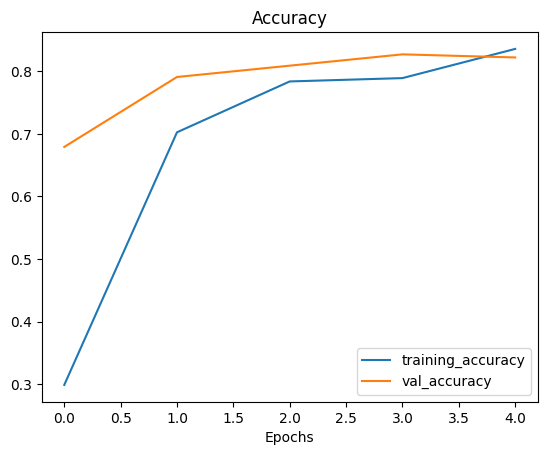

In [46]:
plot_loss_curves(history_10_percent_data_aug)

In [47]:
model_2.load_weights(checkpoint_path)

In [48]:
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 7s 85ms/step - loss: 0.6189 - accuracy: 0.8472


## Model 3: Fine tuning an existing model on 10% of the data

**Note** fine tuning usually workds best *after* training a feature extraction model for a few epochs with large amountsof custom data

#### layers in loaded Model
####  for fine tuning the firstly we have to train the feature extraction model and have to save there weights then we have to unfreeze the preceding layer

In [49]:
model_2.layers

In [51]:
for layer in model_2.layers:
  print(layer, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x7dfb55754b80> True
<keras.src.engine.sequential.Sequential object at 0x7dfbd856f610> True
<keras.src.engine.functional.Functional object at 0x7dfb5555d6c0> False
<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7dfb342ab490> True
<keras.src.layers.core.dense.Dense object at 0x7dfb0c3bd930> True


In [52]:
# how many trainable vairables are in our base model?
print(len(model_2.layers[2].trainable_variables))

0


In [53]:
base_model.trainable = True
for layer in base_model.layers[:-10]:
  layer.trainable = False

model_2.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
                metrics = ['accuracy'])

In [54]:
print(len(model_2.trainable_variables))

12


In [55]:
wb.init(project = 'Food101', name = '10_percent_data_aug_fine_tuning')
fine_tune_epochs = 5 + 5
# refit the model (same as model_2 except with more trainable layer)
history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                               epochs = fine_tune_epochs,
                                               validation_data = test_data,
                                               validation_steps = int(0.25 * len(test_data)),
                                               initial_epoch = history_10_percent_data_aug.epoch[-1],
                                               callbacks = [create_tensorboard_callback(dir_name = "transfer_learning",
                                                                                        experiment_name = "10_precent_fine_tune_last_10"),
                                                            WandbMetricsLogger()])
wb.finish()

Saving TensorBoard log files to: transfer_learning/10_precent_fine_tune_last_10/20240506-021956
Epoch 5/10
24/24 [==============================] - 30s 829ms/step - loss: 0.6270 - accuracy: 0.8293 - val_loss: 0.5058 - val_accuracy: 0.8454
Epoch 6/10
24/24 [==============================] - 14s 570ms/step - loss: 0.4744 - accuracy: 0.8640 - val_loss: 0.4740 - val_accuracy: 0.8454
Epoch 7/10
24/24 [==============================] - 16s 665ms/step - loss: 0.4261 - accuracy: 0.8747 - val_loss: 0.4431 - val_accuracy: 0.8503
Epoch 8/10
24/24 [==============================] - 13s 501ms/step - loss: 0.3970 - accuracy: 0.8840 - val_loss: 0.4714 - val_accuracy: 0.8438
Epoch 9/10
24/24 [==============================] - 15s 622ms/step - loss: 0.3568 - accuracy: 0.8907 - val_loss: 0.4084 - val_accuracy: 0.8651
Epoch 10/10
24/24 [==============================] - 14s 575ms/step - loss: 0.2813 - accuracy: 0.9347 - val_loss: 0.4395 - val_accuracy: 0.8602


epoch/accuracy,▁▃▄▅▅█
epoch/epoch,▁▂▄▅▇█
epoch/learning_rate,▁▁▁▁▁▁
epoch/loss,█▅▄▃▃▁
epoch/val_accuracy,▂▂▃▁█▆
epoch/val_loss,█▆▃▆▁▃
epoch/accuracy,0.93467
epoch/epoch,9
epoch/learning_rate,0.0001
epoch/loss,0.28129
epoch/val_accuracy,0.8602


In [56]:
results_fine_tune_10_percent = model_2.evaluate(test_data)
results_fine_tune_10_percent

79/79 [==============================] - 8s 97ms/step - loss: 0.4145 - accuracy: 0.8712


[0.41446900367736816, 0.8712000250816345]

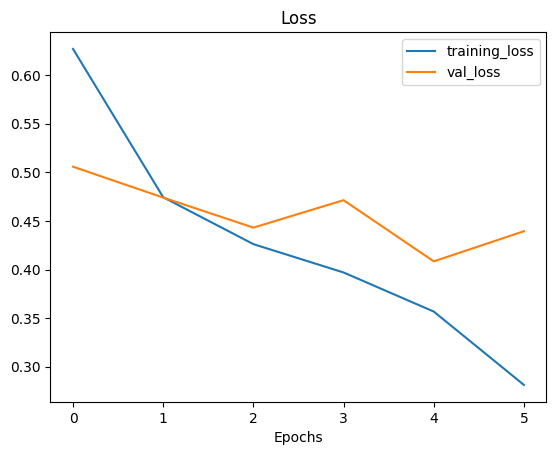

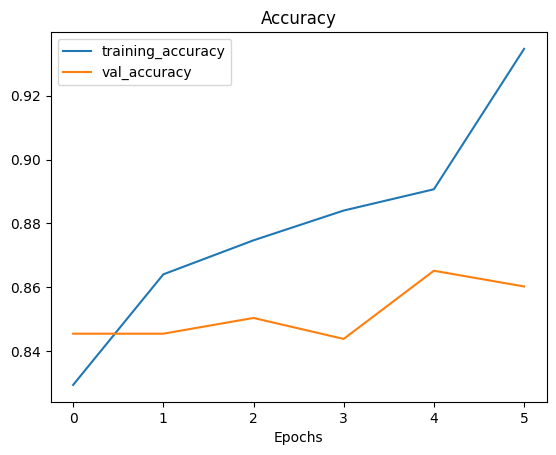

In [57]:
plot_loss_curves(history_fine_10_percent_data_aug)

In [58]:
 # Let's create a function to plot loss curve for compare before and after fine turning

def compare_histories(original_history, new_history, initial_epochs = 5):
  """
  Compare two tensorflow history objects
  """

  acc = original_history.history['accuracy']
  loss = original_history.history['loss']

  val_acc = original_history.history['val_accuracy']
  val_loss = original_history.history['val_loss']

  # combine original history
  total_acc = acc + new_history.history['accuracy']
  total_loss = loss + new_history.history['loss']

  #validation
  total_val_acc = val_acc + new_history.history['val_accuracy']
  total_val_loss = val_loss + new_history.history['val_loss']

  # Make plots accuracy
  plt.figure(figsize = (8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc, label = "Training Accuracy")
  plt.plot(total_val_acc, label = "Val Accuracy")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label = "Start fine tuning", linestyle = '--')
  plt.legend(loc = 'lower right')
  plt.title("Training and validation accuracy")

  # make plot for loss
  plt.figure(figsize = (8,8))
  plt.subplot(2,1,2)
  plt.plot(total_loss, label = "Training loss")
  plt.plot(total_val_loss, label = "Val loss")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label = "Start fine tuning", linestyle = '--')
  plt.legend(loc = 'upper right')
  plt.title("Training and validation loss")

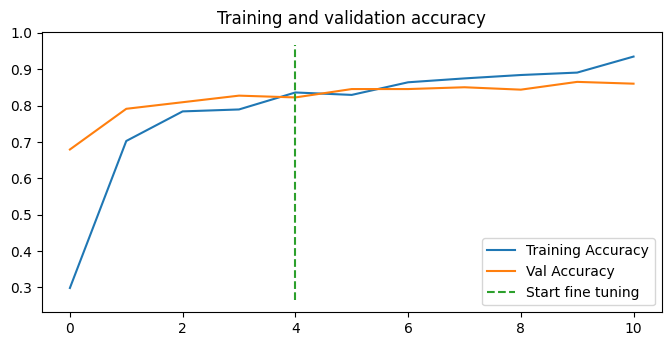

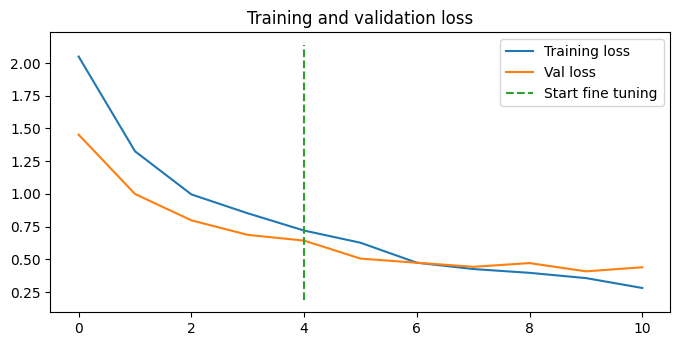

In [59]:
compare_histories(history_10_percent_data_aug, history_fine_10_percent_data_aug)

## Model_4 : fine Tuning existing model on all of the data

In [60]:
# Download and unzip 10_classes of food 101 data with all images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

--2024-05-06 02:25:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.207, 142.250.99.207, 142.250.107.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  36.5MB/s    in 8.8s    

2024-05-06 02:25:40 (56.5 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [61]:
train_dir_all_data = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [62]:
walk_through_dir(train_dir_all_data)

There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.


In [63]:
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 

In [64]:
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all_data,
                                                                                 label_mode = 'categorical',
                                                                                 image_size = IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode = 'categorical',
                                                                image_size = IMG_SIZE )

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [65]:
# Evaluate model 2 (this is the fine-tuned 10 percent of data version)
model_2.evaluate(test_data)

79/79 [==============================] - 8s 88ms/step - loss: 0.4145 - accuracy: 0.8712


[0.4144689440727234, 0.8712000250816345]

so train model 4 fine-tuning we have to revert model_2 back to its feature extraction weights

In [66]:
IMG_SIZE = (224, 224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            label_mode = 'categorical',
                                                                            image_size = IMG_SIZE,
                                                                            batch_size = 32)

test_Data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode = 'categorical',
                                                                image_size = IMG_SIZE,
                                                                batch_size = 32)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [67]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# build data augmentation layer
data_augmentation = Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomRotation(0.2),
    # preprocessing.Rescaling(1./255) # if you are using a model as ResNetv2, but Efficient net has rescaling built in
], name = "data_augmentation")

# Setup the input shape to our model
input_shape = IMG_SIZE+ (3,)

# Create a frozon base model (also called the backbone)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

# Create the inputs and outputs (including the layer in between)
inputs = layers.Input(shape = input_shape, name = "input_layer")
x = data_augmentation(inputs)
x = base_model(x, training = False) # using training = False keeps the model in inference mode (Batch normalization layers don't get updated)
x = layers.GlobalAveragePooling2D(name = 'global_average_pooling_2d')(x) # generated a multidimensional layer and we want to convert that into a feature vector
outputs = layers.Dense(10, activation = 'softmax', name = 'output_layer')(x)

model_2 = tf.keras.Model(inputs, outputs)

# compile
model_2.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])
model_2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling_2d   (None, 1280)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

In [68]:
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"

# create a model checkpoint callback that save the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                                         save_weights_only = True,
                                                         save_best_only = False,
                                                         save_freq = 'epoch', # save every epoch
                                                         verbose = 1)

In [69]:
history_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                          callbacks = [checkpoint_callback, create_tensorboard_callback(dir_name = "transfer_learning",
                                                                                                        experiment_name = "10_percent_data_aug")],
                                          epochs = 5,
                                          validation_data = test_data,
                                          validation_steps = int(0.25 * len(test_data))
                                          )

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20240506-022846
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9873 - accuracy: 0.3373
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 23s 645ms/step - loss: 1.9873 - accuracy: 0.3373 - val_loss: 1.4608 - val_accuracy: 0.6661
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3329 - accuracy: 0.6867
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 12s 490ms/step - loss: 1.3329 - accuracy: 0.6867 - val_loss: 0.9726 - val_accuracy: 0.7928
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.9796 - accuracy: 0.7747
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 13s 518ms/step - loss: 0.9796 - accuracy: 0.7747 - val_loss: 0.7762 - val_accuracy: 0.8273
E

In [70]:
model_2.evaluate(test_data)

79/79 [==============================] - 5s 62ms/step - loss: 0.6319 - accuracy: 0.8388


[0.6319259405136108, 0.8388000130653381]

1. Trained a feature extraction transfer learning model for 5 epochs on 10% fo the dat with data augmentation (model_2) and we saved the model's weights using `model_checkpoint` callback

2. Fine-tuned the same model on the same 10% of the data for the further 5 epochs with the top 10 layers of the base moidel unforzen (model_3)

3. Saved the results and training log each time

4. reloaded the model form step1 to do the same steps as steps 2 except this time we're goint to use all of the data(model_4)

In [71]:
# to begin fine-tuning, let's start by setting the last 10 layers of our base_model.trinable = True
base_model.trainable = True

for layer in base_model.layers[:-10]:
  layer.trainable = False

# recompile (we have to recompile every time we make a change)
model_2.compile(loss = 'categorical_crossentropy',
                optimizer = keras.optimizers.Adam(learning_rate = 0.0001), # when fine-tuning we typically want to lower the learning rate by 10x
                metrics = ['accuracy'])

In [72]:
fine_tune_epochs = 5 + 5
wb.init(project = 'Food101', name = 'full_data_aug_fine_tuning')
history_fine_10_classes_full = model_2.fit(train_data_10_classes_full,
                                           epochs = fine_tune_epochs,
                                           validation_data = test_data,
                                           validation_steps = int(0.25  * len(test_data)),
                                           initial_epoch = history_10_percent_data_aug.epoch[-1],
                                           callbacks = [create_tensorboard_callback(dir_name = "transfer_learning",
                                                                                    experiment_name = 'full_10_classes_fine_tune_full_data'),
                                                        WandbMetricsLogger()])
wb.finish()

Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune_full_data/20240506-023158
Epoch 5/10
235/235 [==============================] - 102s 392ms/step - loss: 0.6465 - accuracy: 0.7971 - val_loss: 0.3393 - val_accuracy: 0.8882
Epoch 6/10
235/235 [==============================] - 81s 343ms/step - loss: 0.5245 - accuracy: 0.8285 - val_loss: 0.2899 - val_accuracy: 0.9128
Epoch 7/10
235/235 [==============================] - 69s 292ms/step - loss: 0.4655 - accuracy: 0.8475 - val_loss: 0.2738 - val_accuracy: 0.9178
Epoch 8/10
235/235 [==============================] - 72s 303ms/step - loss: 0.4197 - accuracy: 0.8691 - val_loss: 0.2429 - val_accuracy: 0.9260
Epoch 9/10
235/235 [==============================] - 58s 246ms/step - loss: 0.3765 - accuracy: 0.8783 - val_loss: 0.2392 - val_accuracy: 0.9276
Epoch 10/10
235/235 [==============================] - 55s 234ms/step - loss: 0.3564 - accuracy: 0.8815 - val_loss: 0.2154 - val_accuracy: 0.9293


epoch/accuracy,▁▄▅▇██
epoch/epoch,▁▂▄▅▇█
epoch/learning_rate,▁▁▁▁▁▁
epoch/loss,█▅▄▃▁▁
epoch/val_accuracy,▁▅▆▇██
epoch/val_loss,█▅▄▃▂▁
epoch/accuracy,0.88147
epoch/epoch,9
epoch/learning_rate,0.0001
epoch/loss,0.35639
epoch/val_accuracy,0.92928


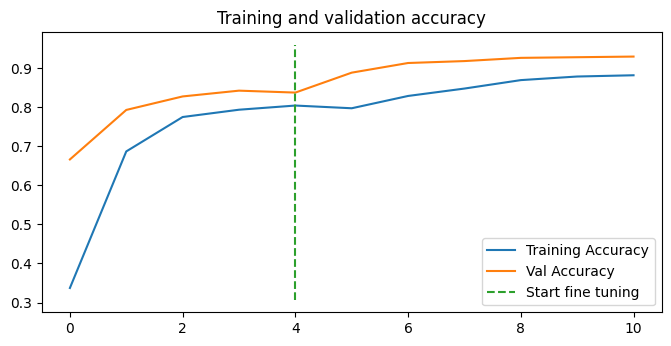

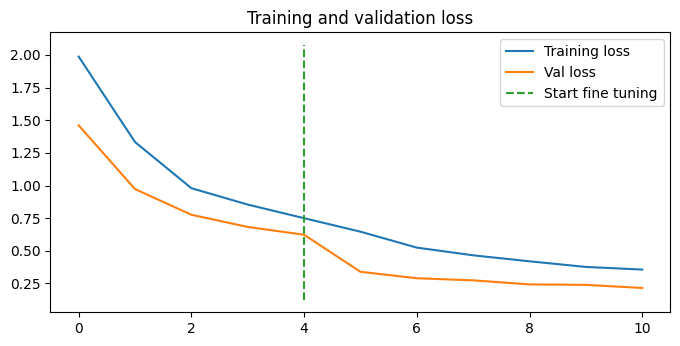

In [73]:
compare_histories(history_10_percent_data_aug, history_fine_10_classes_full)


In [74]:
results_fine_tune_full_data = model_2. evaluate(test_data)

79/79 [==============================] - 5s 61ms/step - loss: 0.2599 - accuracy: 0.9128


In [75]:
results_fine_tune_full_data

[0.2599407732486725, 0.9128000140190125]

## Viewing our experiments data on Tensorboard

In [76]:
!tensorboard dev upload --logdir ./transfer_learning \
  --name "Transfer Learning Experiments with 10 food 101 classes" \
  --description "A series of different transfer learning experiments with varrying amount of data and complexity" \
  --one_shot #exits the uploader onec its finished uploading

2024-05-06 02:39:58.682433: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-06 02:39:58.682483: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-06 02:39:58.683758: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-06 02:39:59.664001: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
****************************************************************
****************************************************************
****************************************************************

Uploading TensorBoard logs to https://tensorb